<a href="https://colab.research.google.com/github/Luca-sketch/EstudoAr/blob/main/MVP_Cancelamento_Cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [37]:
# Carga do dataset
# Atualizando para o caminho do arquivo enviado
file_path = 'https://raw.githubusercontent.com/Luca-sketch/EstudoAr/main/WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Lê o arquivo
dataset = pd.read_csv(file_path)

# Mostra as primeiras linhas do dataset
print(dataset.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [38]:
# Ajuste do dataset
# Remover a coluna 'customerID', pois é irrelevante para a modelagem
dataset = dataset.drop(['customerID'], axis=1)

# Convertendo a coluna 'Churn' para binário de forma direta, sem lambda
dataset['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)

# Verificando se há valores faltantes
print(dataset.isnull().sum())

# Convertendo todas as colunas categóricas para valores numéricos
categorical_columns = dataset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    dataset[col] = pd.Categorical(dataset[col]).codes

# Verificando se há valores não numéricos
print(dataset.dtypes)

# Separação em conjuntos de treino e teste usando a abordagem do exemplo
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Conversão do dataset para um array NumPy
array = dataset.values

# Selecionando as colunas preditoras (X) e a variável alvo (y)
X = array[:, :-1]  # Todas as colunas, exceto a última
y = array[:, -1]   # A última coluna é o alvo

# Dividindo em treino e teste com estratificação, conforme o padrão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)

# Configurando parâmetros de validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed)

# Mostrando a forma dos dados para verificar se está correto
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
gender                 int8
SeniorCitizen         int64
Partner                int8
Dependents             int8
tenure                int64
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges          int16
Churn          

KNN: 0.744584 (0.010542)
CART: 0.720265 (0.017255)
NB: 0.751689 (0.013269)
SVM: 0.734647 (0.000712)


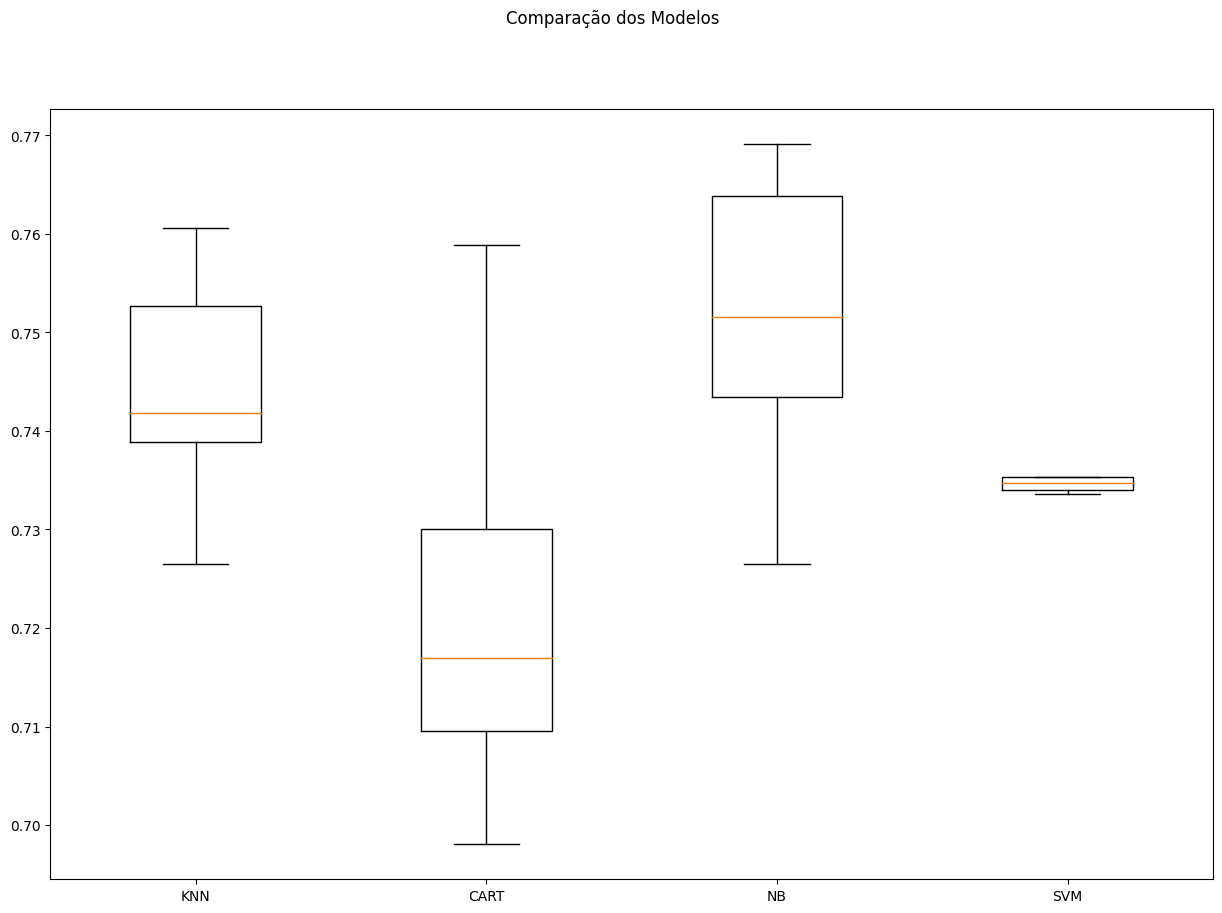

In [39]:
# Definindo a semente global para reprodutibilidade
np.random.seed(7)

# Lista que armazenará os modelos de machine learning
models = []

# Adicionando os modelos clássicos à lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos usando validação cruzada
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos resultados dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


KNN-orig: 0.745 (0.011)
CART-orig: 0.720 (0.017)
NB-orig: 0.752 (0.013)
SVM-orig: 0.735 (0.001)
KNN-padr: 0.755 (0.007)
CART-padr: 0.720 (0.014)
NB-padr: 0.751 (0.013)
SVM-padr: 0.794 (0.011)
KNN-norm: 0.748 (0.007)
CART-norm: 0.726 (0.013)
NB-norm: 0.751 (0.013)
SVM-norm: 0.794 (0.009)


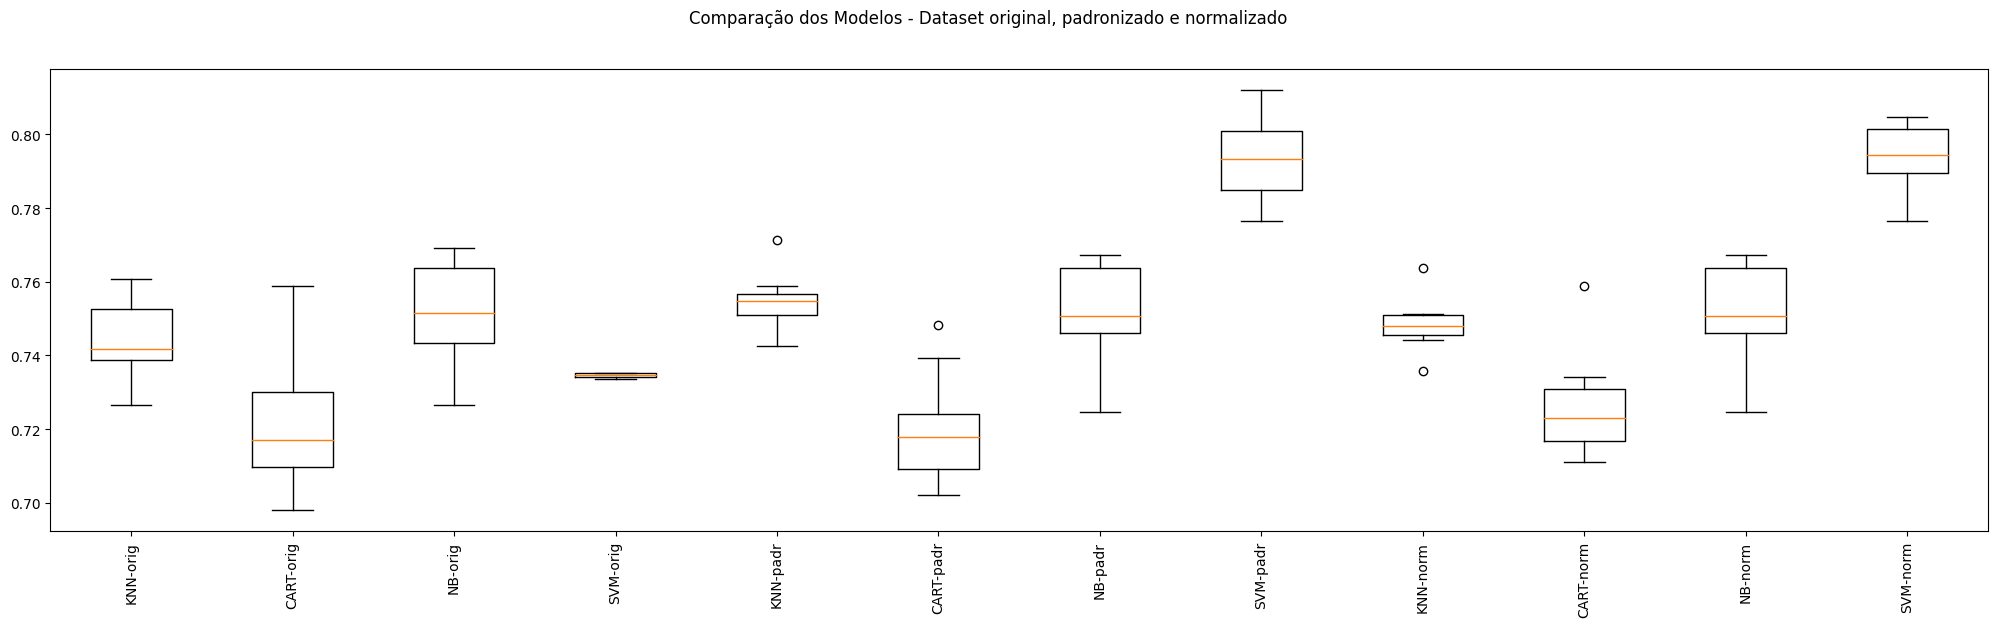

In [40]:
# Definindo a semente global para este bloco
np.random.seed(7)

# Listas para armazenar os pipelines e os resultados para todas as transformações do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original (sem transformações)
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado (StandardScaler)
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado (MinMaxScaler)
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines e avaliando o desempenho dos modelos com validação cruzada
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())  # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


In [41]:
# Definindo a semente global para este bloco
np.random.seed(7)

# Lista de pipelines
pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Adicionando pipelines para dataset original, padronizado e normalizado
pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

# Definindo o grid de parâmetros a ser otimizado
param_grid = {
    'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # número de vizinhos
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],  # métricas de distância
}

# Preparar e executar o GridSearchCV para otimização
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)

    # Imprime a melhor configuração encontrada para cada pipeline
    print("%s - Melhor Score: %.4f usando os parâmetros: %s" % (name, grid.best_score_, grid.best_params_))


knn-orig - Melhor Score: 0.7600 usando os parâmetros: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
knn-padr - Melhor Score: 0.7778 usando os parâmetros: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}
knn-norm - Melhor Score: 0.7756 usando os parâmetros: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17}


In [42]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train)  # ajuste do scaler com o conjunto de treino
rescaledX_train = scaler.transform(X_train)  # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=19)  # usando os melhores parâmetros otimizados
model.fit(rescaledX_train, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledX_test = scaler.transform(X_test)  # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledX_test)

# Exibindo a acurácia no conjunto de teste
accuracy = accuracy_score(y_test, predictions)
print(f'Acurácia no conjunto de teste: {accuracy:.4f}')  # imprimindo com 4 casas decimais

Acurácia no conjunto de teste: 0.7928


In [43]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X)  # ajuste do scaler com TODO o dataset
rescaledX_full = scaler.transform(X)  # aplicação da padronização com TODO o dataset
model.fit(rescaledX_full, y)

# Exibindo o classificador final ajustado
print(f'Modelo final ajustado: {model}')

Modelo final ajustado: KNeighborsClassifier(metric='manhattan', n_neighbors=19)
